## Preprocessing and Visualising the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing_df = pd.read_csv('data.csv')

In [3]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.289255,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704145,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.888000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


There are some null/empty values in RM. Its rows are less than the rest of the data
It needs to be filled

In [6]:
# This will look for empty/null values, replace it with median of that column values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_df)

SimpleImputer(strategy='median')

In [7]:
house_imput = imputer.transform(housing_df)

In [8]:
# Replacing the filled values in the dataframe

housing_df = pd.DataFrame(house_imput, columns = housing_df.columns)
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.288462,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.700695,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.888250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

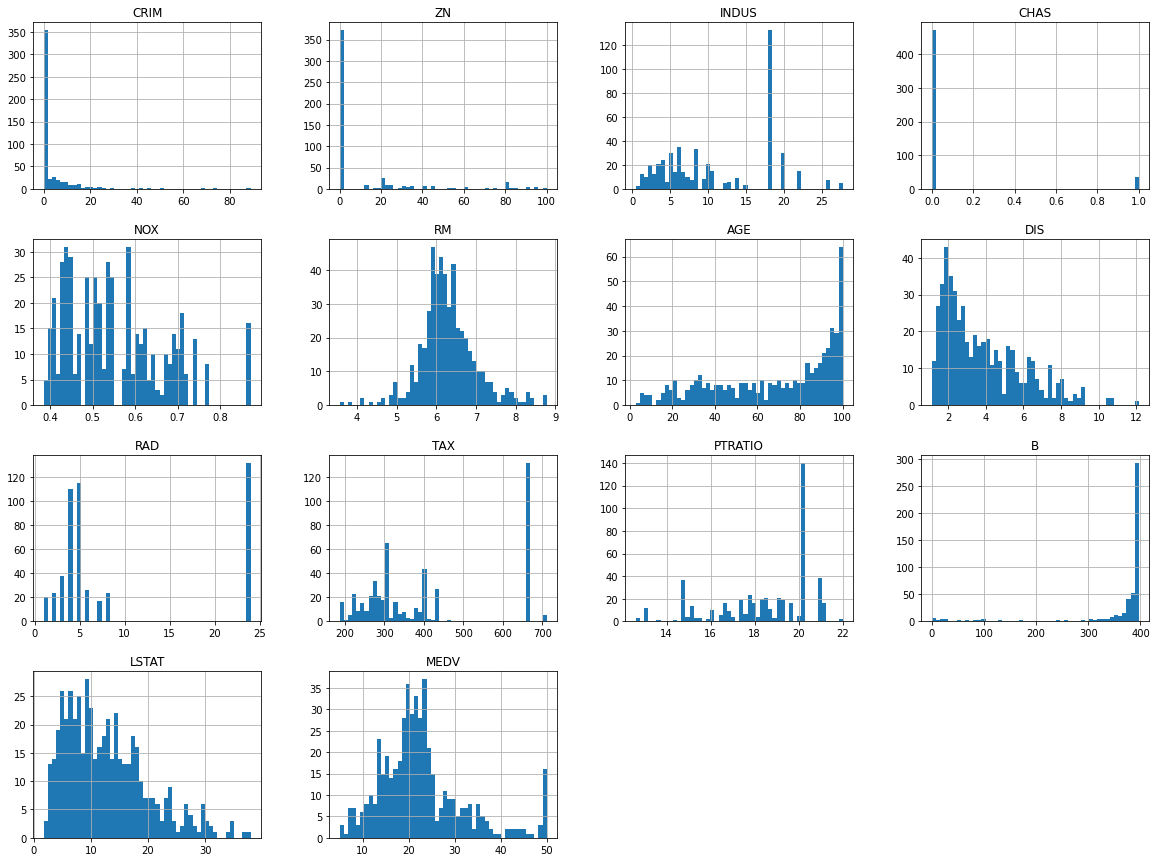

In [10]:
housing_df.hist(bins=50, figsize=(20,15))

#### Correlation of different features on each other

In [11]:
# Showing the relationship of one feature with other
# It can be Strong Positive , negative and can be weak
# We can check our label(Price), how much thins depends on each feature

correlation_matrix = housing_df.corr()
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.221651,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.310478,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.395470,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.090011,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.305201,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.221651,0.310478,-0.395470,0.090011,-0.305201,1.000000,-0.238186,0.208432,-0.214043,-0.296875,-0.353983,0.129858,-0.610585,0.693451
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.238186,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.208432,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.214043,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.296875,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [12]:
# Checking the correlation of MEDV on the other varaibles
correlation_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.693451
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

* MEDV is having strong positive corellation with RM
* MEDV is having strong negative corellation with LSTAT and PTRATIO
##### Lets see them on Scatter Plot

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

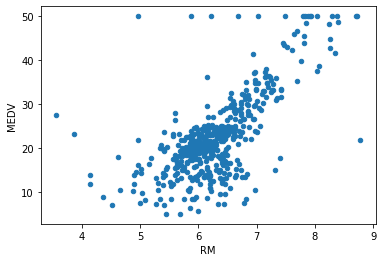

In [13]:
# There are some outliers but the general trend is upward
# Increasing RM increases the Prices which is MEDV
housing_df.plot(kind="scatter", x='RM', y="MEDV")

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

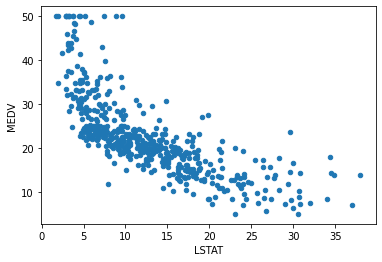

In [14]:
# Here the General Trend is downward, 
# Increasing LSTAT decreases the MEDV (price of houses)
housing_df.plot(kind="scatter", x='LSTAT', y="MEDV")

## Standardization and Normalization

#### Normalization
* Normalization: Rescales the Value in range of [0 1] 
* Also called Min-max Scaling
* Normalization = (Value - min) / (min - max) 
* Normalization is good when the distribution of data does not follow Guassian Distribution
* In Sklearn we have MinMaxScalar for it

#### Standardization
* It rescale the data to have zero mean and unit variance (std = 1)
* It is good when the data follow the Guassian Distribution
* Standardization = (Value - mean()) / std
* IN Sklearn, we have StandardScalar for it

#### Why We use Standardization or Normalization?
* Suppose some features are large in magnitude while some are small, if we trained our model on it, the model would be more inclined toward those features having large magnitudes, while the smaller ones would have less impact even if they are very important. 
* We do standardization or Normalization to re-scale our data so that all the features are more or less same in magnitude. All of them would have equal chance to be represented in model training without any kind of injustice xD. 

### It must be remembered that we only Scale the X ( independent features ). 
### y ( label) is not scaled in regression problems

In [15]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
# Seperating the X and y here to avoid label from scaling (Normaliz / standardize)
X = housing_df.drop("MEDV", axis=1) # All columns are assigned to X except MEDV which is our label


y = housing_df["MEDV"] # Assigning only MEDV to y which is the label



In [17]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
X.shape

(506, 13)

In [19]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [20]:
y.shape

(506,)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
# Scaled_housing_df is numpy array
X_scaled = scaler.fit_transform(X)  # only X would be scaled/standardised
# Converting the numpy array into pandas dataframe
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [23]:
X.head()  # unsclaed X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
X_scaled_df.head() # Standardised X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.409338,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.189339,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.280763,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.013621,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.226478,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


## Splitting Data into Train Test 

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size = 0.2, random_state = 42)

## Selecting and Training and Prediction of the Model

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [29]:
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor() # RandomForestRegressor() gives the best result

In [30]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
val_data = X_train.iloc[:5]
val_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,1.327804,-0.487722,1.015999,-0.272599,0.512296,-1.406370,1.021481,-0.805438,1.661245,1.530926,0.806576,-0.078878,1.718101
15,-0.347506,-0.487722,-0.437258,-0.272599,-0.144217,-0.649230,-0.429390,0.334449,-0.637962,-0.601276,1.176466,0.427018,-0.586356
332,-0.416484,1.014463,-0.740749,-0.272599,-1.008914,-0.367802,-1.610001,1.352738,-0.982843,-0.619094,-0.719220,0.061137,-0.676067
423,0.399963,-0.487722,1.015999,-0.272599,0.512296,-0.264945,0.587642,-0.842945,1.661245,1.530926,0.806576,-3.883072,1.491020
19,-0.336054,-0.487722,-0.437258,-0.272599,-0.144217,-0.802086,0.032897,0.000693,-0.637962,-0.601276,1.176466,0.375814,-0.192467


In [32]:
val_label = y_train.iloc[:5]
val_label

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
Name: MEDV, dtype: float64

In [33]:
model.predict(val_data)

array([12.637, 19.989, 20.063, 13.27 , 18.494])

In [34]:
list(val_label)

[12.0, 19.9, 19.4, 13.4, 18.2]

## Evaluating the Model

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
y_hat = model.predict(X_train)


In [37]:
mse = mean_squared_error(y_train, y_hat)
mse

2.1097746064356424

In [38]:
rmse = np.sqrt(mse)
rmse

1.4525063188969756

In [39]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([3.11901722, 3.44801687, 2.52794106, 5.45220409, 4.81364927,
       2.90185726, 3.82482027, 2.68935832, 2.60912756, 4.54678449])

In [40]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [41]:
print_scores(rmse_scores)

Scores: [3.11901722 3.44801687 2.52794106 5.45220409 4.81364927 2.90185726
 3.82482027 2.68935832 2.60912756 4.54678449]
Mean:  3.5932776406161153
Standard deviation:  0.9773613006879406


## Saving the Model

In [42]:
from joblib import dump, load
dump(model, 'HousingPrice.joblib') 

['HousingPrice.joblib']

## Testing of Model

In [43]:
model_prediction = model.predict(X_test)
MSE = mean_squared_error(y_test, model_prediction)
RMSE = np.sqrt(MSE)
RMSE

3.1648255101670175

## Loading the Trained Model and Using it

In [44]:
loaded_model = load('HousingPrice.joblib')

In [45]:

# features = np.array([[0.00632, 18.0, 2.31, 0, 0.538, 6.575, 65.2, 4.0900, 1, 296, 15.3, 396.90, 4.98]])

features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])

In [46]:
my_pred = loaded_model.predict(features)

C:\Anaconda\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [47]:
my_pred 

array([23.974])